<a href="https://colab.research.google.com/github/athadis/archana_INFO5502_Spring2022/blob/main/in_class_excercises/lab_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The tenth Lab-assignment (04/28/2022, 50 points in total)

The purpose of this assignment is to practice normal distribution and annotation quality evaluation.

### Question 1 (25 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab10-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [5]:
# your code here
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df=pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab10-dataset.csv')

# label encoding the categorical data
label_encoder = LabelEncoder()

# label encode
label_encoder.fit(df['Annotation1'])

# fitting the Annotation 1 data and transforming the annotation 2 & annotation 3
df['le_A1'] = label_encoder.transform(df['Annotation1'])
df['le_A2'] = label_encoder.transform(df['Annotation2'])
df['le_A3'] = label_encoder.transform(df['Annotation3'])


from sklearn.metrics import cohen_kappa_score

# finding pair-wise cohen's kappa score
score1 = cohen_kappa_score(list(df['le_A1'].values), list(df['le_A2'].values))
score2 = cohen_kappa_score(list(df['le_A2'].values), list(df['le_A3'].values))
score3 = cohen_kappa_score(list(df['le_A3'].values), list(df['le_A1'].values))

# take average of all 3 scores
avg_kappa_score = (score1 + score2 + score3)/3
print("Cohen's kappa score is:", round(avg_kappa_score, 2))

# determining agreement based on cohen kappa score
if avg_kappa_score < 0.0:
    print("Less than chance agreement")

elif ((avg_kappa_score >= 0.01) & (avg_kappa_score <= 0.20)):
    print("Slight agreement")

elif ((avg_kappa_score >= 0.21) and (avg_kappa_score <= 0.40)):
    print("Fair agreement")

elif ((avg_kappa_score >= 0.41) and (avg_kappa_score <= 0.60)):
    print("Moderate agreement")

elif ((avg_kappa_score >= 0.61) and (avg_kappa_score <= 0.80)):
    print("Substantial agreement")

elif ((avg_kappa_score >= 0.81) and (avg_kappa_score <= 0.99)):
    print("Almost perfect agreement")

!pip install krippendorff

import krippendorff
df1 = [list(df['le_A1'].values),
        list(df['le_A2'].values),
        list(df['le_A3'].values)]

fleiss_score = krippendorff.alpha(df1)
print("\nFleiss kappa score", round(fleiss_score, 2))



Cohen's kappa score is: 0.54
Moderate agreement

Fleiss kappa score 0.57


### Question 2 (25 points) 

Normal distribution is the default probability for many real world scenarios. It represents a symmetric distribution where most of the observations cluster around the central peak called as mean of the distribution. A normal distribution can be thought of as a bell curve or Gaussian Distribution which typically has two parameters: mean and standard deviation (SD). The parameter used to measure the variability of observations around the mean is called as standard deviation. The probabilities for values occurring near mean are higher than the values far away from the mean. The parameters of the normal distribution plot defining the shape and the probabilities are mean and standard deviation. The area of the plot between two different points in the normal distribution plot represents the probability of the value occurring between those two points.

Please generate the nromal distribution for the following cases suing Python:

(1) IQ scores (the mean is typically 100, SD = 15)

(2) Marks of students in a class (mean = 60, SD = 20)

(3) Measure of weight (mean = 80 kg, SD = 10)

(4) Measure of blood pressure (mean = 120/80, SD = 20)

(5) Measure of wealth (measurement in money; mean = $50,000 , SD = $100)

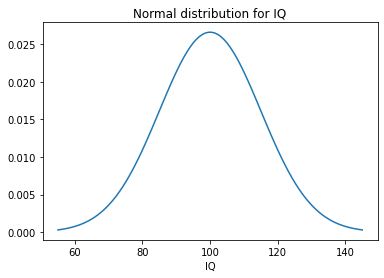

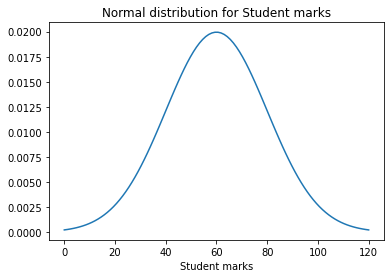

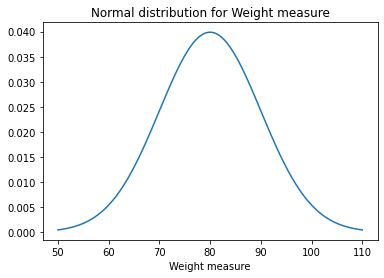

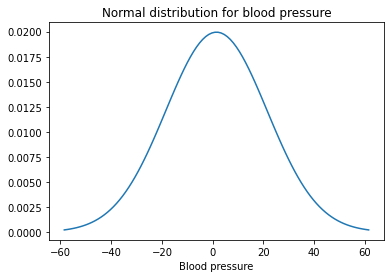

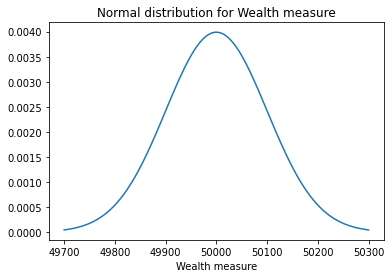

In [6]:
# your code here
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#1)
mean = 100
sd = 15
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, stats.norm.pdf(x, mean, sd))
plt.xlabel('IQ')
plt.title('Normal distribution for IQ')
plt.show() 

#2) 
mean = 60
sd= 20
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, stats.norm.pdf(x, mean, sd))
plt.xlabel('Student marks')
plt.title('Normal distribution for Student marks')
plt.show() 


#3)
mean = 80
sd = 10 
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, stats.norm.pdf(x, mean, sd))
plt.xlabel('Weight measure')
plt.title('Normal distribution for Weight measure')
plt.show() 

#4)
mean = 120/80
sd = 20
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, stats.norm.pdf(x, mean, sd))
plt.xlabel('Blood pressure')
plt.title('Normal distribution for blood pressure')
plt.show() 

mean = 50000
sd = 100
x = np.linspace(mean - 3*sd, mean + 3*sd, 100)
plt.plot(x, stats.norm.pdf(x, mean, sd))
plt.xlabel('Wealth measure')
plt.title('Normal distribution for Wealth measure')
plt.show() 
